In [1]:
# inside this notebook we define the basic libraries and variable that we use often
%run ./load_variables.ipynb 

3721


In [2]:
from smutsia.utils.viz import color_bool_labeling
from smutsia.utils import compute_scores


## RANSAC Example

In this notebook we want to report experiments done on ground detection using RANSAC algorithm.
In particular we are going to test Pyntcloud API.

In [3]:
cloud.points['gt_ground'] = skconfig.labels2ground[cloud.points.labels.values.astype(int)]

In [4]:
%%timeit
is_plane = cloud.add_scalar_field('plane_fit', max_dist=0.30, max_iterations=500, n_inliers_to_stop=None)

1.34 s ± 6.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
y_true = cloud.points.gt_ground.values.astype(int)
y_pred = cloud.points.is_plane.values.astype(int)
compute_scores(y_true, y_pred, print_info=True)

Scores: 
F1 -> 0.8571543483798313,
Recall -> 0.7785679493424257,
Precision -> 0.7785679493424257,
Accuracy -> 0.9123831295381098,
Jaccard -> 0.7500175961335429.
------------------------------------------------


{'f1': 0.8571543483798313,
 'recall': 0.7785679493424257,
 'precision': 0.7785679493424257,
 'acc': 0.9123831295381098,
 'jaccard': 0.7500175961335429}

In [6]:
plot_cloud(cloud.xyz,scalars=color_bool_labeling(y_true, y_pred), rgb=True, point_size=3)

In [7]:
def analyse_results(cloud, interact=False):
    y_true = cloud.points.gt_ground.values.astype(int)
    y_pred = cloud.points.is_plane.values.astype(int)
    compute_scores(y_true, y_pred, print_info=True)
    plot_cloud(cloud.xyz,scalars=color_bool_labeling(y_true, y_pred), rgb=True, point_size=1.5, interact=interact)

### Quantitative analysis

In [8]:
clouds = [load_pyntcloud(f, add_label=True) for f in plyfiles[::10]]

In [9]:
# measure
scores = {'f1':[], 'recall': [], 'precision':[], 'acc':[], 'jaccard':[]}
labels = []
pred = []
for cloud in clouds:
    y_true = skconfig.labels2ground[cloud.points.labels.values.astype(int)]
    cloud.points['gt_ground'] = y_true
    labels.append(cloud.points.labels.values)
    # fitting plane with ransac
    is_plane = cloud.add_scalar_field('plane_fit', max_dist=0.25, max_iterations=500, n_inliers_to_stop=None)
    y_pred = cloud.points.is_plane.values.astype(int)
    pred.append(y_pred)
    c_scores = compute_scores(y_true, y_pred)
    for k in c_scores:
        scores[k].append(c_scores[k])


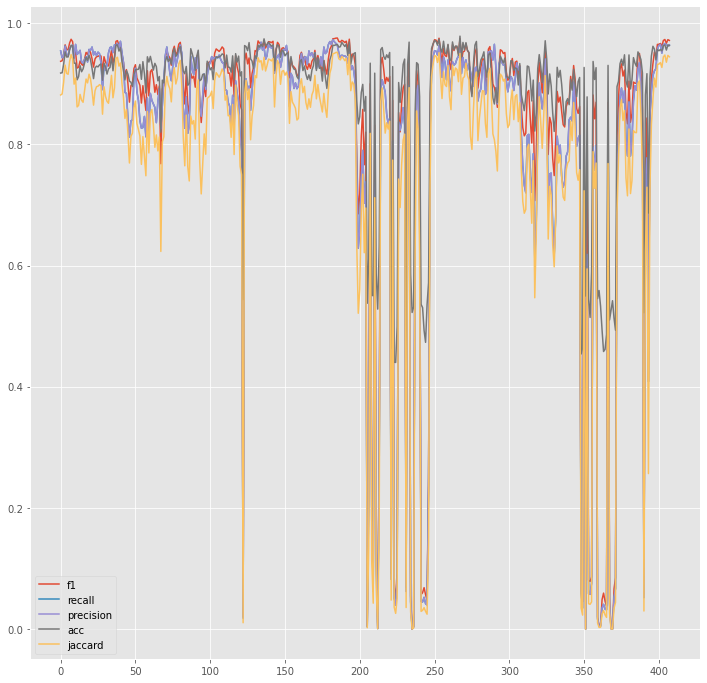

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
for k in scores:
    plt.plot(scores[k])
plt.legend(list(scores.keys()))

In [24]:
y_true = np.concatenate(labels)
y_pred = 40*np.concatenate(pred)

In [31]:
from smutsia.utils.scores import get_confusion_matrix, condense_confusion_matrix,normalize_confusion_matrix

In [17]:
carLikeId=[10,13,18]
bikeLikeId=[11,15,31,32]
personId=[30]
groundLikeId=[40,44,48,49,60,72]
buildId=[50]
movingLikeId=[252,253,254,255,256,257,258,259]
groundId = 40



mySelect=[[0],carLikeId,bikeLikeId,personId,groundLikeId,buildId,movingLikeId]
selectedId=[]
condensedId=[]
for elem in mySelect:
    selectedId.extend(elem)
    condensedId.append(elem)
    
print(selectedId,condensedId)

[0, 10, 13, 18, 11, 15, 31, 32, 30, 40, 44, 48, 49, 60, 72, 50, 252, 253, 254, 255, 256, 257, 258, 259] [[0], [10, 13, 18], [11, 15, 31, 32], [30], [40, 44, 48, 49, 60, 72], [50], [252, 253, 254, 255, 256, 257, 258, 259]]


AttributeError: 'tuple' object has no attribute 'shape'

In [28]:
cm = get_confusion_matrix(y_true, y_pred, selectedId)

In [32]:
conf_mat=condense_confusion_matrix(cm[0],selectedId,condensedId)
conf_mat=conf_mat.astype(int)
conf_mat_norm=normalize_confusion_matrix(conf_mat)

In [33]:
conf_mat_norm

array([[0.88, 0.  , 0.  , 0.  , 0.12, 0.  , 0.  ],
       [0.9 , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ],
       [0.85, 0.  , 0.  , 0.  , 0.15, 0.  , 0.  ],
       [0.9 , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.91, 0.  , 0.  ],
       [0.95, 0.  , 0.  , 0.  , 0.05, 0.  , 0.  ],
       [0.9 , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ]])

In [ ]:
clouds[2].points.head()

In [61]:
np.array([[1, 1], [2, 2]]).sum(axis=1)

array([2, 4])

In [66]:
nr, nc = conf_mat.shape
sr = conf_mat.astype(float).sum(axis=1)[:, np.newaxis]

In [67]:
np.divide(conf_mat, sr, where=sr!=0.0)

array([[0.88447964, 0.        , 0.        , 0.        , 0.11552036,
        0.        , 0.        ],
       [0.89541297, 0.        , 0.        , 0.        , 0.10458703,
        0.        , 0.        ],
       [0.85301717, 0.        , 0.        , 0.        , 0.14698283,
        0.        , 0.        ],
       [0.90404353, 0.        , 0.        , 0.        , 0.09595647,
        0.        , 0.        ],
       [0.0912768 , 0.        , 0.        , 0.        , 0.9087232 ,
        0.        , 0.        ],
       [0.94529553, 0.        , 0.        , 0.        , 0.05470447,
        0.        , 0.        ],
       [0.89712542, 0.        , 0.        , 0.        , 0.10287458,
        0.        , 0.        ]])

In [85]:
def mat_renorm_rows(M):
    sr = M.astype(float).sum(axis=1)[:, np.newaxis]
    return np.divide(M, sr, where=sr!=0.0)
import matplotlib as mpl
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(8,8),
                          savefig=""):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.style.use('ggplot')
    font = {
        'family': 'arial',
        'size': 14}

    mpl.rc('font', **font)
    if normalize:
#         from smutsia.utils.scores import normalize_confusion_matrix
        cm_plot = mat_renorm_rows(cm)
    else:
        cm_plot = cm

    plt.figure(figsize=figsize)
    ax = plt.gca()
    im = ax.imshow(cm_plot, interpolation='nearest', cmap=cmap)
    ax.grid(False)

    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = 0.5 if normalize else cm_plot.max() / 2
    for i, j in itertools.product(range(cm_plot.shape[0]), range(cm_plot.shape[1])):
        plt.text(j, i, format(cm_plot[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_plot[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)
    plt.colorbar(im, cax=cax)
    plt.tight_layout()
    if len(savefig) > 0:
        plt.savefig(savefig, dpi=90)

    # restore style to default settings
    mpl.rcParams.update(mpl.rcParamsDefault)

In [78]:
M = np.array([[99, 1], [0, 0]])
mat_renorm_rows(M)

array([[0.99, 0.01],
       [0.  , 0.  ]])

In [36]:
classes = ['other', 'vehicles', 'cycles', 'person', 'ground', 'building', 'moving-objects']

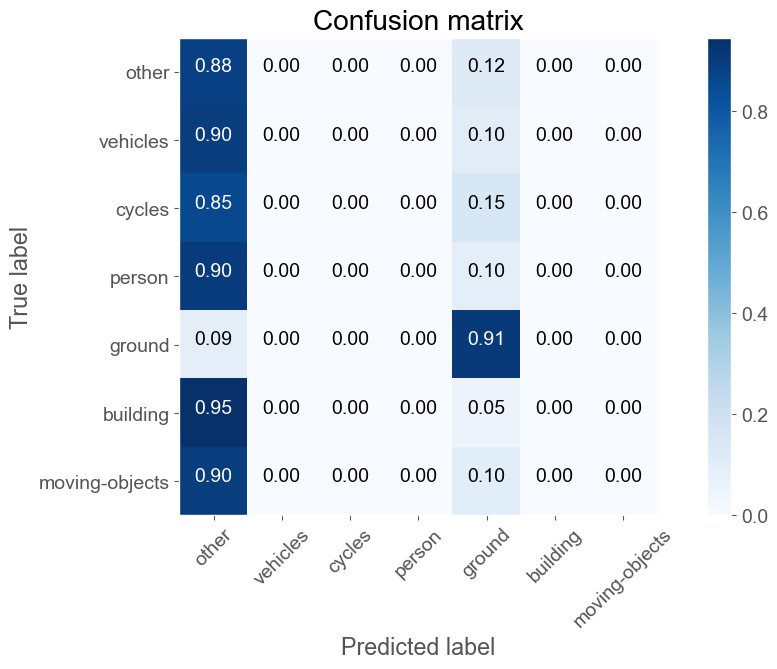

In [89]:
file_path = '/home/leonardo/ownCloud/PhD/Reports/Thesis/thesis/Chapter3/Figs/ransac_cm.eps'
plot_confusion_matrix(conf_mat, classes, normalize=True, savefig=file_path)

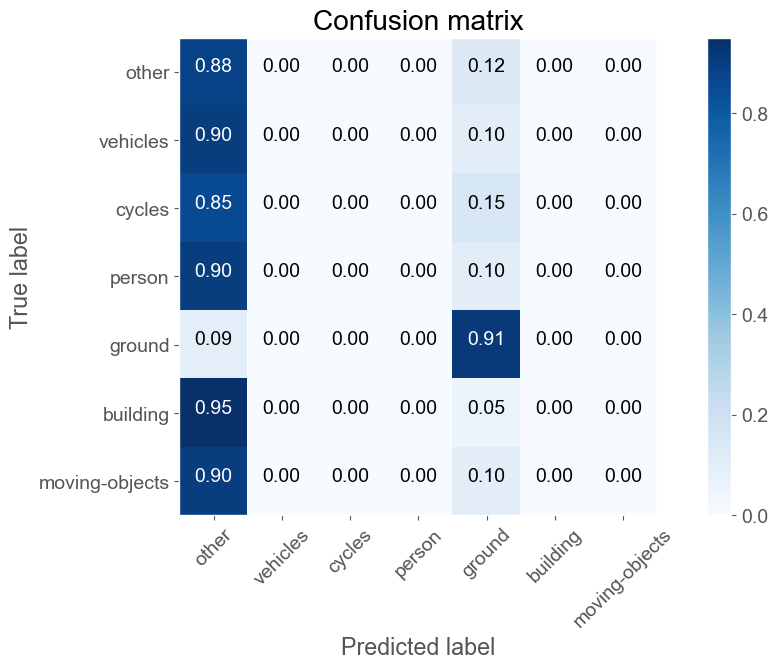

In [88]:
plot_confusion_matrix(conf_mat_norm, classes, normalize=True)